In [1]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import numpy as np
import re

img shapes : (4384, 4096)


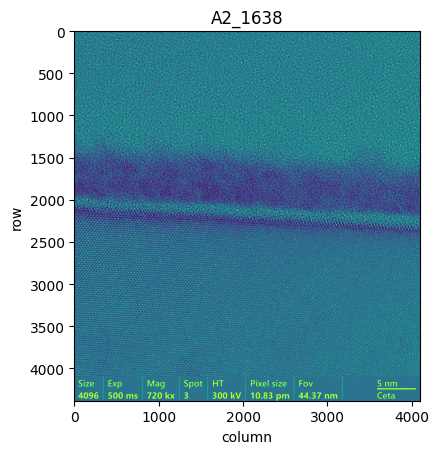

In [2]:
img = cv2.imread('TEM_image/A2/A-#2_ Camera 1638 720 kx Ceta Ceta.png', cv2.IMREAD_GRAYSCALE)
print('img shapes :', img.shape)

plt.imshow(img)
plt.xlabel('column')
plt.ylabel('row')
plt.title('A2_1638')
plt.show()

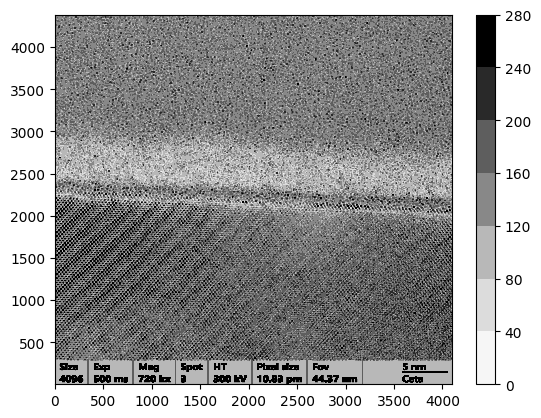

In [39]:
y = range(img.shape[0],0,-1)
x = range(img.shape[1])
X, Y = np.meshgrid(x, y)
Z = img
im = plt.contourf(X, Y, Z, cmap='Greys', vmin=0, vmax=255)
plt.colorbar(im)

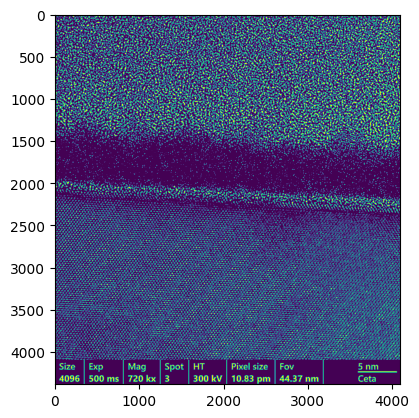

In [89]:
# histogram equalization; minmaxscaling * 255
img_equalized = cv2.equalizeHist(img)

# apply threshold
_, binary = cv2.threshold(img_equalized, 200, 255, cv2.THRESH_BINARY)
plt.imshow(binary)
plt.show()

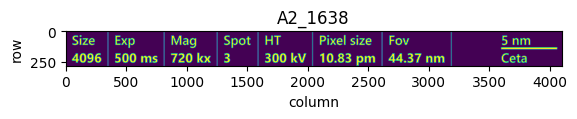

In [85]:
plt.imshow(img[4100:,:])
plt.xlabel('column')
plt.ylabel('row')
plt.title('A2_1638')
plt.show()

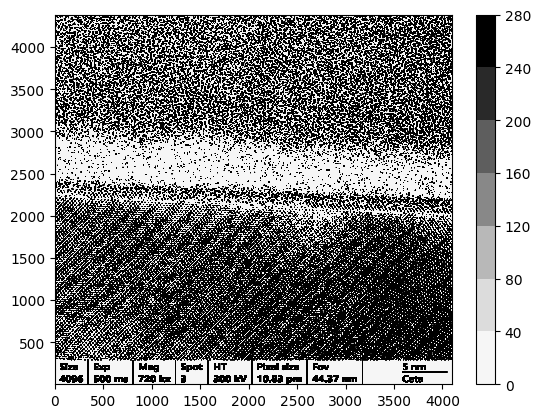

In [67]:
y = range(binary.shape[0],0,-1)
x = range(binary.shape[1])
X, Y = np.meshgrid(x, y)
Z = binary
im = plt.contourf(X, Y, Z, cmap='Greys', vmin=0, vmax=255)
plt.colorbar(im)

In [25]:
img_equalized.max()

255

In [95]:
# given that the scale bar is located at the bottom of size about 10 % of the height
n_loop = int(binary.shape[0] * 0.05)
start = binary.shape[0] - n_loop -1
row_max = []
for i in range(n_loop):
    row_max.append(np.count_nonzero(binary[start+i,:]==255))
np.argmax(row_max)

182

In [74]:
start

4164

In [96]:
# location of the scale bar
bar = binary[start+np.argmax(row_max)]
bar_bool = (bar == 255)
flag = 0
len_max = 0

start_point = []
end_point = []
for i in range(len(bar_bool)-1):
    char = ('0' if bar_bool[i]==False else '1') + ('0' if bar_bool[i+1]==False else '1')
    if char == '00':
        continue
    elif char == '01':
        flag += 1
        start_point.append(i)
        len_max = flag
    elif char =='10':
        flag = 0
        end_point.append(i)
    elif char == '11':
        flag += 1
        len_max = flag
len_max

19

In [93]:
print(start_point)
print(end_point)

[81, 117, 178, 242, 341, 404, 467, 529, 618, 652, 686, 712, 804, 877, 926, 992, 1081, 1108, 1141, 1168, 1241, 1303, 1578, 1640, 1704, 1766, 1855, 1882, 1930, 2027, 2110, 2153, 2211, 2242, 2302, 2394, 2461, 2495, 2529, 2600, 2690, 2752, 2784, 2814, 2887, 2967, 3002, 3032, 3066, 3100, 3171, 3598, 3659, 3693, 3719, 3743, 3751, 3777]
[97, 160, 219, 285, 349, 448, 510, 572, 635, 669, 703, 753, 812, 895, 976, 1035, 1098, 1128, 1159, 1187, 1249, 1348, 1586, 1685, 1747, 1809, 1872, 1902, 1957, 2035, 2127, 2196, 2230, 2290, 2348, 2446, 2478, 2512, 2546, 2608, 2706, 2768, 2803, 2859, 2904, 2984, 3020, 3049, 3083, 3118, 3179, 3647, 3677, 3701, 3735, 3745, 3766, 3796]


In [103]:
diff = []
for s, e in zip(start_point, end_point):
    diff.append(e-s)
max(diff)

52

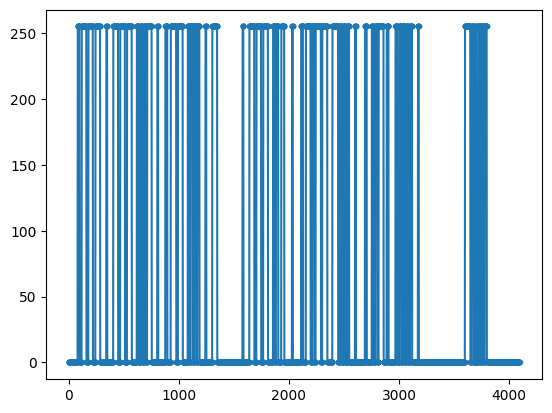

In [101]:
plt.plot(bar,'.-')